In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

In [ ]:
# reading the data from the memory
data = pd.read_excel('Online Retail.xlsx')

In [ ]:
# Printing firdt five rows of the data frame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Dealing with the null values
# Look at the number of unique values in each column
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### Removal of NULL values

In [ ]:
# Look at the number of null values in each column
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Remove all the null values
data = data[pd.notnull(data['CustomerID'])]

In [ ]:
# Count the number of null values again
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Remove all the columns which contain Quantity as 0
data = data[data['Quantity'] > 0]

## Distribution analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

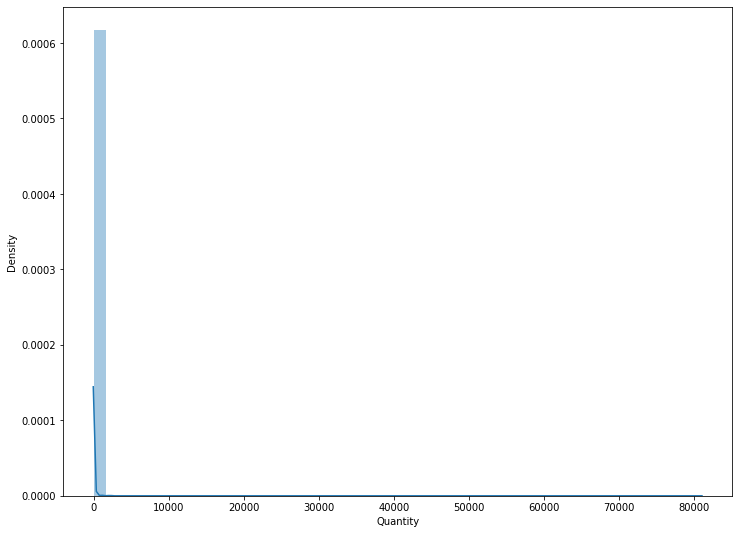

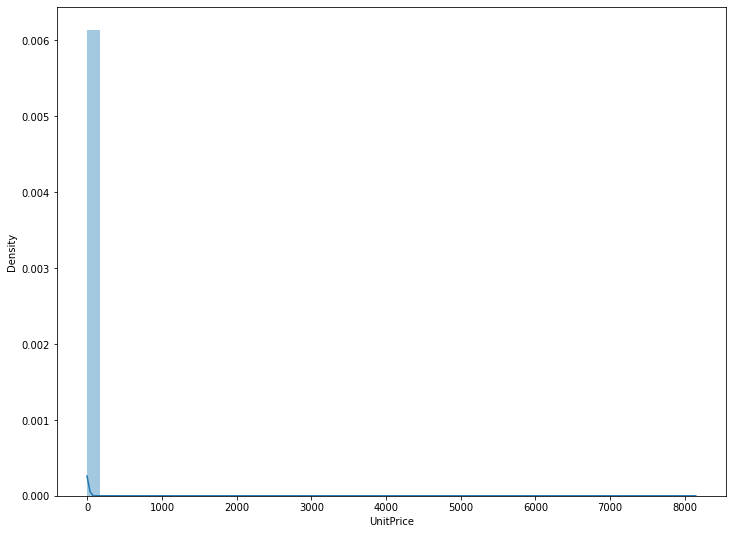

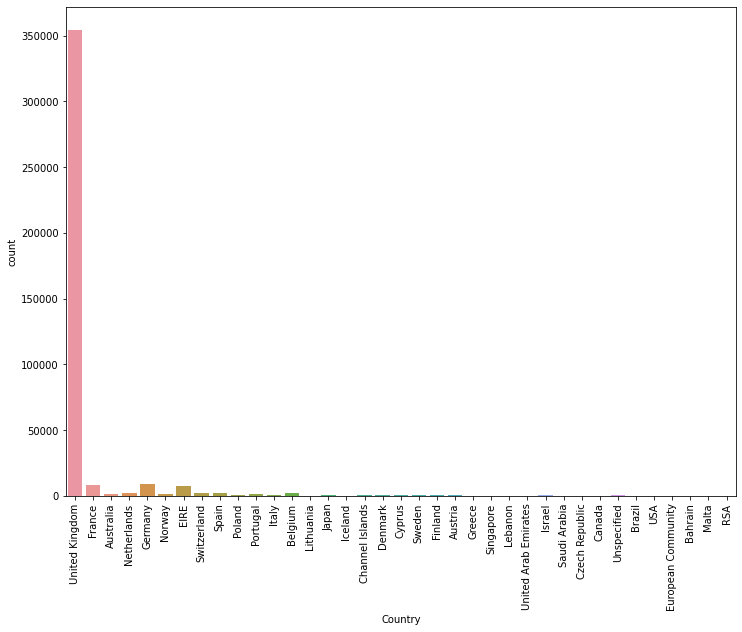

In [ ]:
# From all the columns listed in the data the columns Quantity and UnitPrice are quantitative columns
# Following code will perform the distribution analysis on these columns.


for col in ['Quantity', 'UnitPrice']:
  plt.figure(figsize=(12, 9))
  sns.distplot(data[col])

plt.figure(figsize = (12, 9))
g = sns.countplot(data['Country'])
g.set_xticklabels(data['Country'].unique(), rotation=90)
plt.show()

### Statistical exploration

In [ ]:
# Statistical exploration
data.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


### Correlation analysis

            Quantity  UnitPrice  CustomerID
Quantity    1.000000  -0.004561   -0.006411
UnitPrice  -0.004561   1.000000   -0.010863
CustomerID -0.006411  -0.010863    1.000000


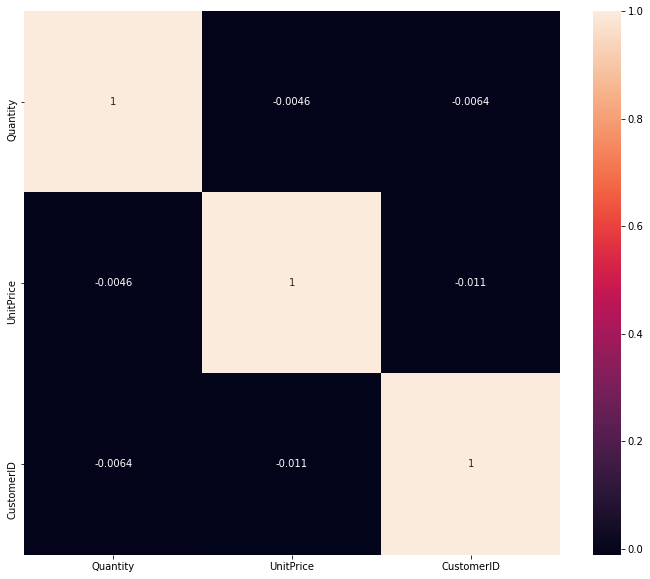

In [ ]:
# Correlation analysis
# Visualization of correlation matrix using heatmap
corr = data.corr()
print(corr)
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot = True)

In [ ]:
# Transformation of the data as required
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.3+ MB
None


### Removal of duplicates

In [ ]:
# Now we drop the duplicates

data = data.drop_duplicates()

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB
None


### Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


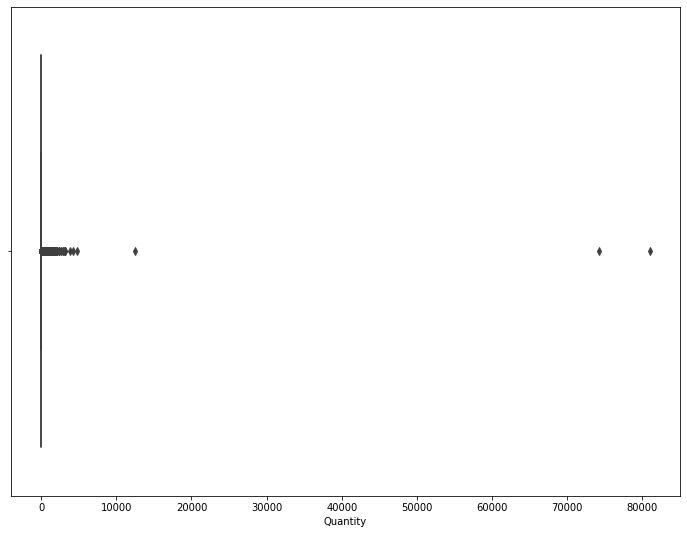

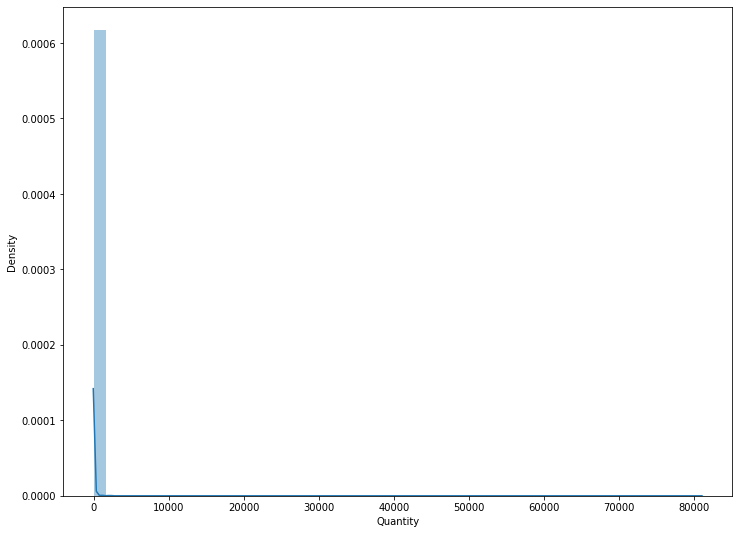

In [ ]:
# Now we will visualise the data we have
# Sepcially for Quantity and UnitPrice

plt.figure(figsize=(12, 9))
sns.boxplot(x = data['Quantity'])

# We have a lot of Quantity as 0 lets remove the zeros
plt.figure(figsize=(12, 9))
sns.distplot(data['Quantity'])

In [ ]:
# data[data['Quantity'] > 0]['Quantity'].max()

In [ ]:
# Now we will seperate the the usefull columns for further analysis

data = data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39
2,17850.0,2010-12-01 08:26:00,536365,8,2.75
3,17850.0,2010-12-01 08:26:00,536365,6,3.39
4,17850.0,2010-12-01 08:26:00,536365,6,3.39


## RMF Segmentation

In [ ]:
# Using todays datewe will calculate the recent purchase
# Applying the aggrigation on the columns

import datetime as dt
today = dt.datetime(2021,4,11)

rfm= data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'UnitPrice': lambda price: price.sum()})

In [ ]:
rfm.head()

,InvoiceDate,InvoiceNo,UnitPrice
CustomerID,,,
12346.0,3735,1,1.04
12347.0,3412,182,481.21
12348.0,3485,31,178.71
12349.0,3428,73,605.10
12350.0,3720,17,65.30


In [ ]:
# Now we will rename the columns

rfm.columns = ['monetary','frequency','recency']
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,3735,1,1.04
12347.0,3412,182,481.21
12348.0,3485,31,178.71
12349.0,3428,73,605.10
12350.0,3720,17,65.30


In [ ]:
# Following lines will help to quantize all the columns
# Each columns will quantised into four quantiles
rfm['recency_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['frequency_quartile'] = pd.qcut(rfm['frequency'], 4, ['1','2','3','4'])
rfm['monetary_quartile'] = pd.qcut(rfm['monetary'], 4, ['1','2','3','4'])

In [ ]:
rfm.head()

,monetary,frequency,recency,recency_quartile,frequency_quartile,monetary_quartile
CustomerID,,,,,,
12346.0,3735,1,1.04,1,1,4
12347.0,3412,182,481.21,4,4,1
12348.0,3485,31,178.71,3,2,3
12349.0,3428,73,605.10,4,3,2
12350.0,3720,17,65.30,2,1,4


In [ ]:
# Now using the Quantised columns to create 'RMF' Values

rfm['RFM'] = rfm.recency_quartile.astype(str)+ rfm.frequency_quartile.astype(str) + rfm.monetary_quartile.astype(str)
rfm.head()

,monetary,frequency,recency,recency_quartile,frequency_quartile,monetary_quartile,RFM
CustomerID,,,,,,,
12346.0,3735,1,1.04,1,1,4,114
12347.0,3412,182,481.21,4,4,1,441
12348.0,3485,31,178.71,3,2,3,323
12349.0,3428,73,605.10,4,3,2,432
12350.0,3720,17,65.30,2,1,4,214


## K-Means Clustering
The following code will be for K-Means segmentation

In [ ]:
# Extraction of the three columns for K-Means Clustering
# We will again use the monetary, frequency and recency columns for further analysis

data_v2 = rfm[['monetary','frequency','recency']]
data_v2.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,3735,1,1.04
12347.0,3412,182,481.21
12348.0,3485,31,178.71
12349.0,3428,73,605.10
12350.0,3720,17,65.30


### Transformation of data

In [ ]:
# K-Means model is based on similarity of the datapoints
# That is why we will Standardize the data

from sklearn.preprocessing import StandardScaler

# Creating objects of StandardScalar class
scalar = StandardScaler()
data_v2 = pd.DataFrame(scalar.fit_transform(data_v2[data_v2.columns]), columns = data_v2.columns)


In [ ]:
# The Standardize data

data_v2.head()

,monetary,frequency,recency
0,2.329673,-0.396968,-0.322010
1,-0.900449,0.405730,0.226551
2,-0.170421,-0.263924,-0.119035
3,-0.740443,-0.077663,0.368086
4,2.179667,-0.326011,-0.248598


### Justification of k value

In [ ]:
# Now we will train multiple k-means models with different values 
# The values of k will range from 2 to 19
# Using the vaues of interia we will get best value of k

from sklearn.cluster import KMeans

inertia_list = []

for k in range(2, 20):
  kmean = KMeans(n_clusters = k)
  kmean.fit(data_v2)
  inertia_list.append(kmean.inertia_)



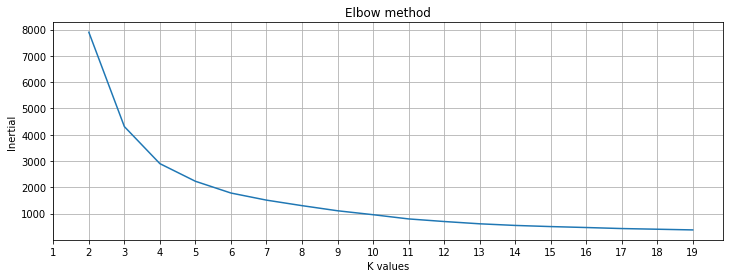

In [ ]:
# Lets plot the inertia values against values of k

plt.figure(figsize = (12, 4))
plt.grid()
plt.plot(range(2, 20), inertia_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K values")
plt.ylabel("Inertial")
plt.title("Elbow method")
plt.show()

In [ ]:
# Now since the best value is calculated we will create the final model

kmean = KMeans(n_clusters = 4)
kmean.fit(data_v2)
labels = kmean.predict(data_v2)

### Testing the k value

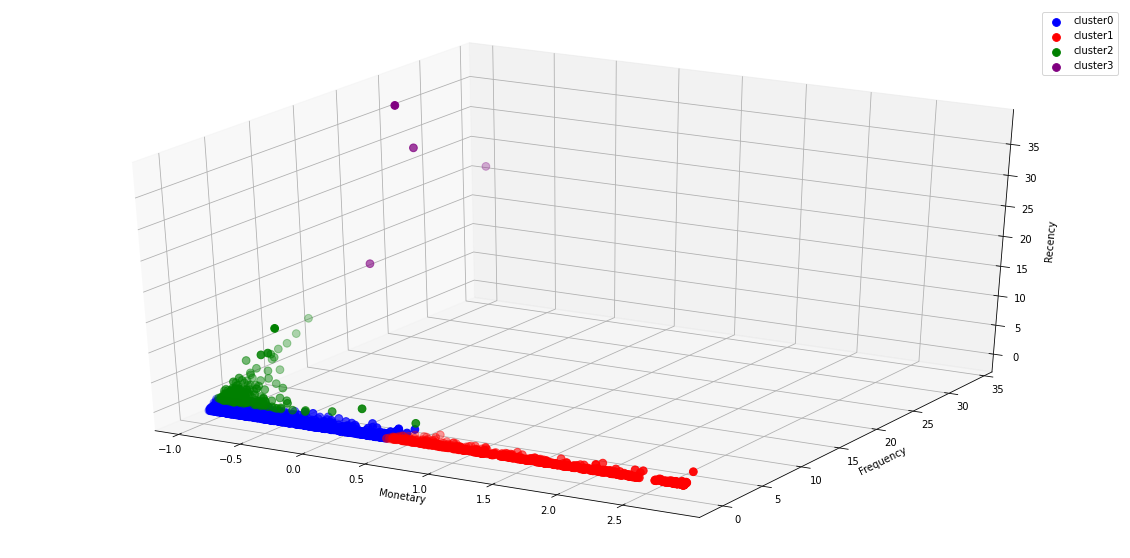

In [ ]:
data_v2['label'] = labels

data_v3 = data_v2[data_v2['label'] == 0]
data_v4 = data_v2[data_v2['label'] == 1]
data_v5 = data_v2[data_v2['label'] == 2]
data_v6 = data_v2[data_v2['label'] == 3]
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_v3[data_v3.columns[:-3]], data_v3[data_v3.columns[1:-2]], data_v3[data_v3.columns[2:-1]], c='blue', s = 60, )
ax.scatter(data_v4[data_v4.columns[:-3]], data_v4[data_v4.columns[1:-2]], data_v4[data_v4.columns[2:-1]], c='red', s = 60, )
ax.scatter(data_v5[data_v5.columns[:-3]], data_v5[data_v5.columns[1:-2]], data_v5[data_v5.columns[2:-1]], c='green', s = 60, )
ax.scatter(data_v6[data_v6.columns[:-3]], data_v6[data_v6.columns[1:-2]], data_v6[data_v6.columns[2:-1]], c='purple', s = 60, )
plt.xlabel("Monetary")
plt.ylabel("Frequency")
ax.set_zlabel('Recency')
plt.legend(["cluster0", "cluster1", "cluster2", "cluster3"])
plt.show()

### Review of the result

In [ ]:
data_v2['label'].value_counts()

0    3052
1    1060
2     223
3       4
Name: label, dtype: int64

In [ ]:
rfm.head(20)

,monetary,frequency,recency,recency_quartile,frequency_quartile,monetary_quartile,RFM
CustomerID,,,,,,,
12346.0,3735,1,1.04,1,1,4,114
12347.0,3412,182,481.21,4,4,1,441
12348.0,3485,31,178.71,3,2,3,323
12349.0,3428,73,605.10,4,3,2,432
12350.0,3720,17,65.30,2,1,4,214
12352.0,3446,85,1354.11,4,3,2,432
12353.0,3614,4,24.30,1,1,4,114
12354.0,3642,58,261.22,3,3,4,334
12355.0,3624,13,54.65,2,1,4,214


In [ ]:
import re
cust = {'Best Customers':1,
        'Loyal Customers':1,
        'Big Spenders':1,
        'Almost Lost':1,
        'Lost':1,
        'Lost Cheap Customers':1,
        'Others':1}

for item in rfm['RFM']:
  if re.match('111', item):
    cust['Best Customers'] += 1
  elif re.match('311', item):
    cust['Almost Lost'] += 1
  elif re.match('411', item):
    cust['Lost'] += 1
  elif re.match('\w+1\w+', item):
    cust['Loyal Customers'] += 1
  elif re.match('\w+\w+1', item):
    cust['Big Spenders'] += 1
  elif re.match('444', item):
    cust['Lost Cheap Customers'] += 1
  else:
    cust['Others'] += 1 

In [ ]:
cust

{'Almost Lost': 3,
 'Best Customers': 87,
 'Big Spenders': 998,
 'Lost': 1,
 'Lost Cheap Customers': 40,
 'Loyal Customers': 1025,
 'Others': 2192}

In [ ]:
cust1 = cust.keys()
vals = cust.values()

In [ ]:
! pip install squarify

In [ ]:
import squarify

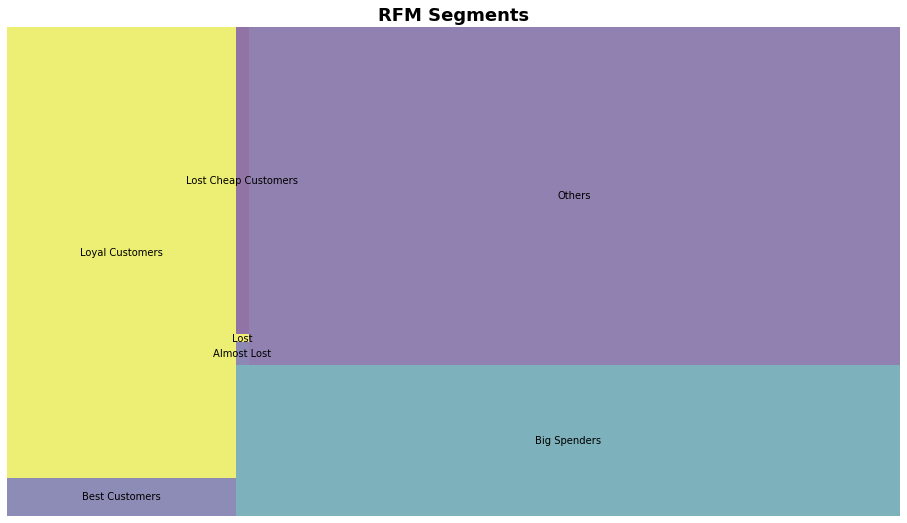

In [ ]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=vals, 
              label=cust1, alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

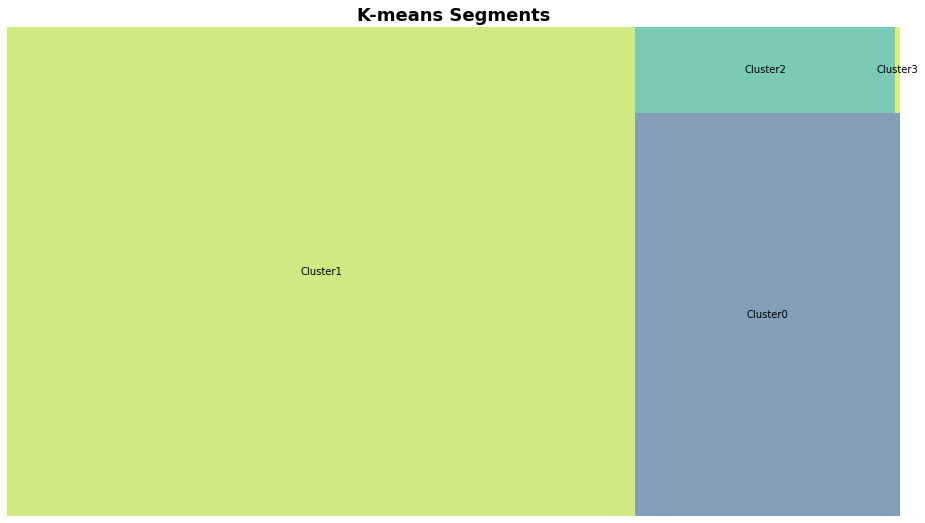

In [ ]:
cust2 = ['Cluster1','Cluster0','Cluster2','Cluster3']

vals = [3052, 1060, 223, 4]

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=vals, 
              label=cust2, alpha=.6 )
plt.title("K-means Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()